# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

order_df = pd.read_csv("Superstore/superstore_order.csv")
people_df = pd.read_csv("Superstore/superstore_people.csv")
return_df = pd.read_csv("Superstore/superstore_return.csv")

2. Determine shape of each dataset (print out the results as well).

In [86]:
print(f"shape of order_df : {order_df.shape}")
print(f"shape of people_df : {people_df.shape}")
print(f"shape of return_df : {return_df.shape}")

shape of order_df : (8880, 21)
shape of people_df : (4, 2)
shape of return_df : (296, 2)


3. Show information of the dataset.


In [87]:
order_df.info()
people_df.info()
return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

4. Are there any missing values? If so, in which column?

Ans: there is no missing value in any column. Checked by `df.info()`

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [88]:
print("unique segment :",order_df.Segment.unique())

unique segment : ['Consumer' 'Corporate' 'Home Office']


In [89]:
segment_count = order_df.groupby(['Segment']).agg(count = ('Row ID','count'))
print("unique segment with count")
display(segment_count)

unique segment with count


,count
Segment,
Consumer,4613
Corporate,2673
Home Office,1594


pie chart of unique segment with count


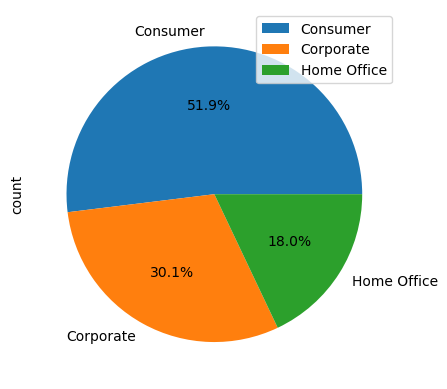

In [90]:
print('pie chart of unique segment with count')
segment_count.plot.pie(y='count',autopct='%1.1f%%')
plt.show()

Answer for the question 5.4

Ans: the segment `Consumer` has the largest amount at $51.9 \%$ of total amount, with `Corporate` and `Home Office` at $30.1\%$ and $18\%$ respectively

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [91]:
print(f"unique state : {order_df.State.unique()}")

unique state : ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [92]:
state_count = order_df.groupby(['State']).agg(count = ('Row ID','count'))
state_count.sort_values('count',ascending=False,inplace=True)
top_10_state_count = state_count.head(10)
display(top_10_state_count)

,count
State,
California,1754
New York,1001
Texas,860
Pennsylvania,531
Washington,452
Illinois,427
Ohio,396
Florida,339
Michigan,230


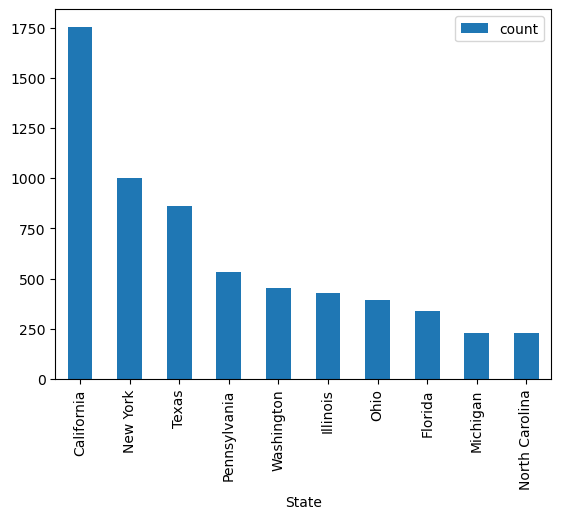

In [93]:
top_10_state_count.plot.bar()
plt.show()

In [94]:
state_count_sales = order_df.groupby(['State']).agg(count=('Row ID','count'),totalSales = ('Sales','sum'))
display(state_count_sales.head())

,count,totalSales
State,,
Alabama,58,19272.4900
Arizona,202,32990.1060
Arkansas,55,9427.4400
California,1754,399195.4555
Colorado,175,31080.8060


,count,totalSales,salesPerOrder
State,,,
Wyoming,1,1603.136,1603.136000
Vermont,3,2214.980,738.326667
Nevada,34,15478.146,455.239588
Rhode Island,53,22468.166,423.927660
Indiana,125,48231.140,385.849120
Montana,15,5589.352,372.623467
Minnesota,85,29254.100,344.165882
Virginia,191,64632.520,338.390157
Alabama,58,19272.490,332.284310


count            3
totalSales       2
salesPerOrder    2
dtype: int64


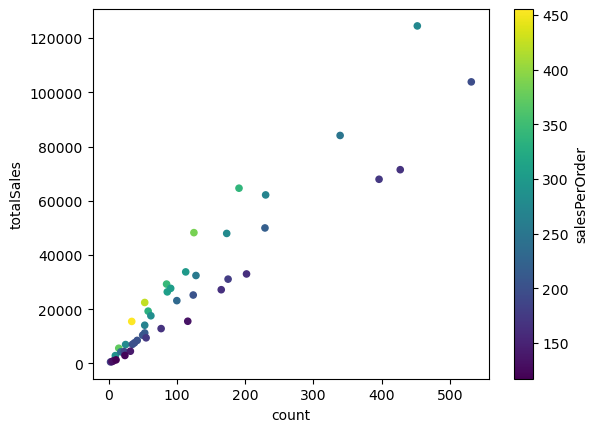

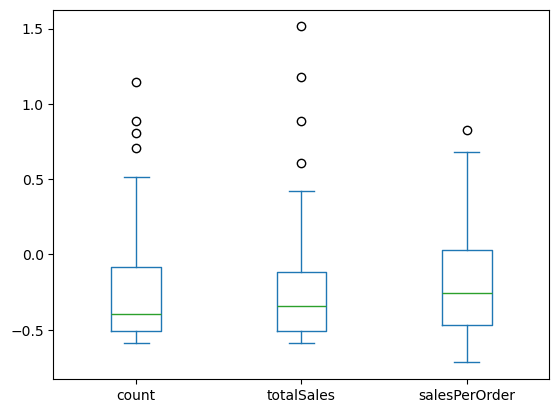

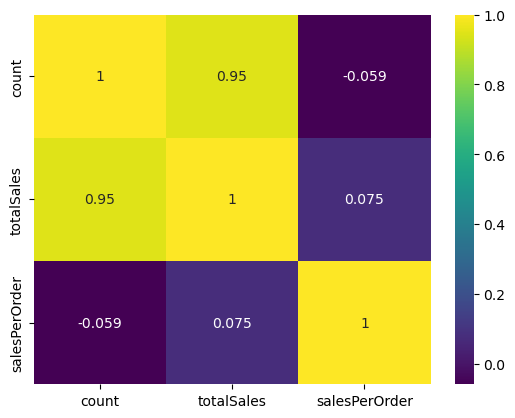

In [95]:
from scipy.stats import zscore
import seaborn as sns

state_count_sales['salesPerOrder'] = state_count_sales['totalSales']/state_count_sales['count']
state_count_sales.sort_values('salesPerOrder',ascending=False,inplace=True)
std_state_count_sales = state_count_sales.apply(zscore)
display(state_count_sales.head(10))
print((std_state_count_sales >2).sum())
filtered_state_count_sales = state_count_sales[std_state_count_sales <= 2]
filtered_state_count_sales.plot.scatter(x='count',y='totalSales',c='salesPerOrder')
std_state_count_sales[std_state_count_sales <= 2].plot.box()
plt.show()
state_sales_corr = filtered_state_count_sales.corr()
sns.heatmap(state_sales_corr,annot=True,cmap='viridis')
plt.show()

Answer for the question 6.5

Ans: as the `count` of order on each state is highly correlated to `totalSales`(as correlation). 
we could see that `salesPerOrder` of each state are pretty much the same, with very little outliers, so higher the order would resulted in higher sales.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [96]:
print(f"unique categories : {order_df.Category.unique()}")

unique categories : ['Furniture' 'Office Supplies' 'Technology']


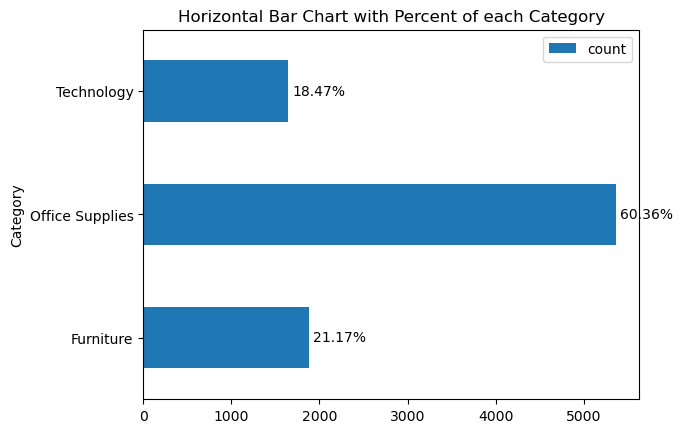

In [97]:
# 7.2 and 7.3
category_count = order_df.groupby(['Category']).agg(count = ('Row ID','count'))
ax = category_count.plot.barh()
labels = category_count['count'] / category_count['count'].sum()
labels = round(labels*100,2)
labels = list(map(lambda num : f"{num}%",labels))
for i, v in enumerate(category_count['count']):
    ax.text(v + 50, i,labels[i] , color='black', va='center')  # Adjust the offset (50) as needed

plt.title('Horizontal Bar Chart with Percent of each Category')
plt.show()

8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [98]:
new_order_df = order_df.copy()
new_order_df.head(5)
for col in order_df.columns:
    if 'Date' in col:
        new_order_df[col] = pd.to_datetime(new_order_df[col],format='%d/%m/%Y')
display(new_order_df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [99]:
# write your code here
new_order_df['processingTimeDay'] = (new_order_df['Ship Date'] - new_order_df['Order Date']).dt.days
new_order_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,processingTimeDay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164,7


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

amount of order that take more than 5 days 1656
top 5 order ordered by process time


,Order ID,Order Date,Ship Date,processingTimeDay,Quantity
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2
16,CA-2014-105893,2014-11-11,2014-11-18,7,6
53,CA-2016-105816,2016-12-11,2016-12-17,6,7
54,CA-2016-105816,2016-12-11,2016-12-17,6,5


<Axes: >

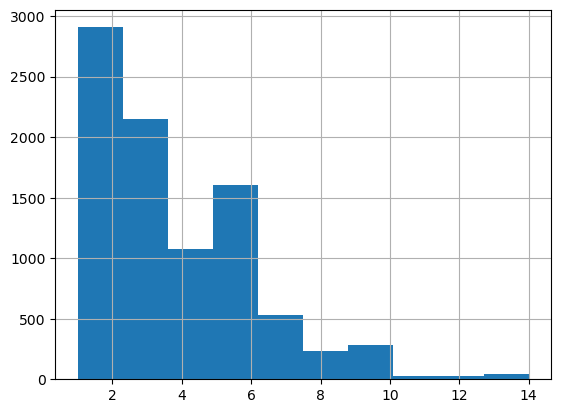

In [100]:
# Write your code here (10.1)
print(f"amount of order that take more than 5 days {(new_order_df['processingTimeDay'] > 5).sum()}")
print("top 5 order ordered by process time")
display(new_order_df[new_order_df['processingTimeDay']>5][['Order ID','Order Date','Ship Date','processingTimeDay','Quantity']].head(5))
new_order_df['Quantity'].hist()

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

,totalSales
Region,
Central,434723.2222
East,603648.0590
South,361376.7910
West,645943.7905


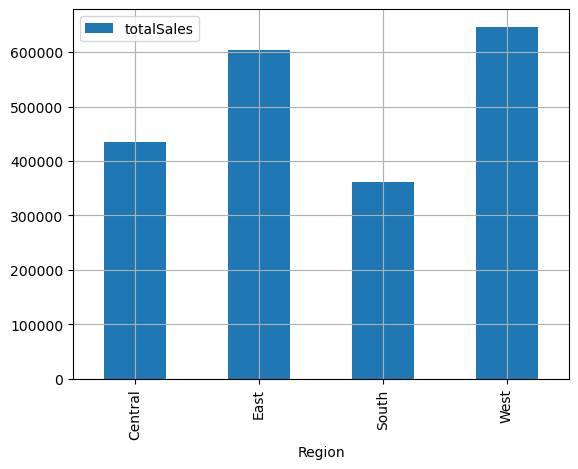

In [101]:
# Write your code here (11.1)
regeion_sales = order_df.groupby('Region').agg(totalSales=("Sales","sum"))
display(regeion_sales)
regeion_sales.plot.bar()
plt.grid(True)
plt.show()

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: as per bar chart, in `region` West, have the highest total sales of around $65,000$. Following by East, which have just a little over $60,000$. Central `region` have the second least `totalSales` around $43,000$ and the least is South `region` on around $36,000$

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans: california

<Axes: ylabel='State'>

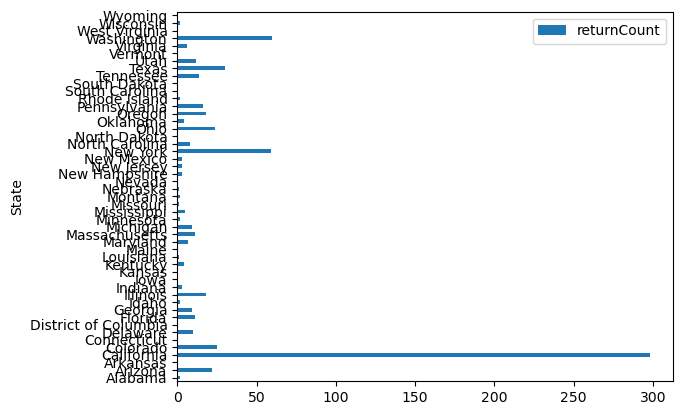

In [102]:
# Write your code here (12)
state_order = order_df[["State","Order ID"]]
state_order_return = state_order.merge(return_df,on="Order ID",how='left')
state_order_return["Returned"] = state_order_return["Returned"] == 'Yes'
state_return_count = state_order_return.groupby(["State"]).agg(returnCount = ('Returned','sum'))
state_return_count.plot.barh()

13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

<Axes: >

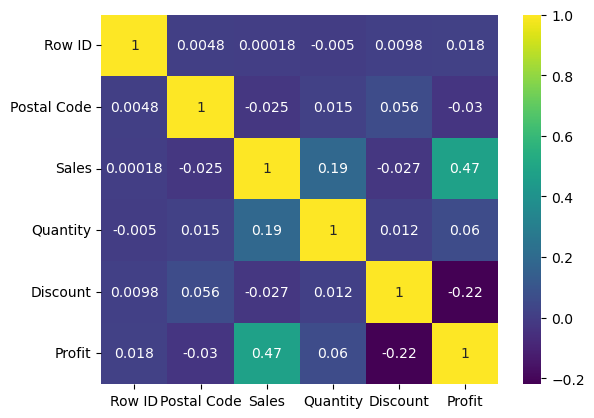

In [103]:
order_corr = order_df.select_dtypes(include=np.number).corr()
sns.heatmap(order_corr,annot=True,cmap="viridis")

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [104]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [105]:
# Write your code here (14)
import plotly.express as px
state_sales = order_df.groupby('State').agg(totalSales=('Sales',"sum")).reset_index()
state_sales["Code"]=state_sales["State"].map(code)
fig = px.choropleth(state_sales,
                    locations='Code',
                    color='totalSales',
                    color_continuous_scale='viridis',
                    hover_name='State',
                    locationmode='USA-states',
                    labels = {"totalSales": "Total Sales(USD)"},
                    scope='usa')
fig.show()

<Axes: >

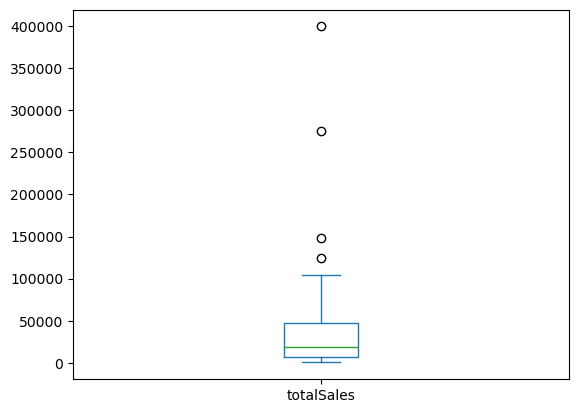

In [106]:
state_sales.totalSales.plot.box()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


1.  `California` just under $400,000$
2.   would cause gradient to extend to unused shade. Since normally `totalSales` would be around $50,000$ but the ouliers at `California` is the only one using yellow shade.
3. I would say just a little. Some color like `Rainbow` is just hard to interprete which one is more or less. But this colormap `viridis` the more, is the lighter



15. Create a box plot to compare the different shipping modes based on total profit.

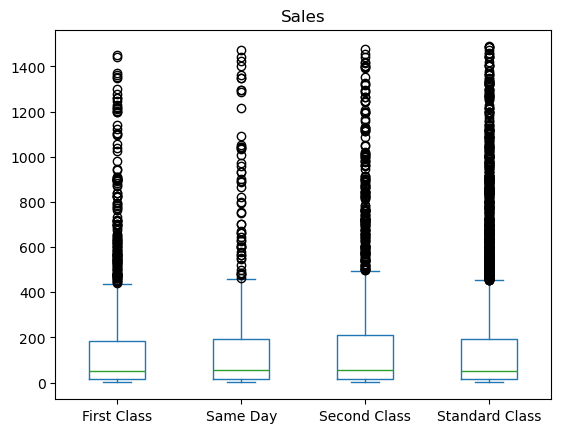

,medianSales
Ship Mode,
First Class,54.36
Same Day,58.33
Second Class,58.48
Standard Class,53.20


In [107]:
#Write your code here (15)
filtered_mode_sales = order_df[["Ship Mode","Sales"]]
filtered_mode_sales = filtered_mode_sales[zscore(filtered_mode_sales['Sales']) <= 2]
filtered_mode_sales.plot.box(column='Sales',by='Ship Mode')
plt.show()
display(order_df.groupby('Ship Mode').agg(medianSales=("Sales","median")))

15.2 Which shipping mode has the highest median profit?

Ans: with boxplot and help of groupby aggregation, the highest one would be `Second Class`, since it is close and hard to determine which one is the most

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [108]:
# Write your code here
customer_order = order_df[["Customer ID","Order ID"]]
customer_order_return = customer_order.merge(return_df,on="Order ID",how='left')
customer_order_return["Returned"] = customer_order_return["Returned"] == 'Yes'
customer_return_count = customer_order_return.groupby(["Customer ID"]).agg(returnCount = ('Returned','sum'))
customer_return_count[customer_return_count["returnCount"]==1]

,returnCount
Customer ID,
AA-10645,1
AB-10255,1
AC-10450,1
AG-10390,1
AG-10495,1
...,...
SS-20590,1
TB-21595,1
TC-21295,1


In [109]:
returned_at_least_once = customer_return_count[customer_return_count["returnCount"]>=1]
returned_at_least_once

,returnCount
Customer ID,
AA-10645,1
AB-10105,4
AB-10255,1
AC-10450,1
AG-10390,1
...,...
WB-21850,11
XP-21865,3
YC-21895,1


In [110]:
never_return = customer_return_count[customer_return_count["returnCount"]<1]
never_return

,returnCount
Customer ID,
AA-10315,0
AA-10375,0
AA-10480,0
AB-10015,0
AB-10060,0
...,...
VM-21835,0
VP-21730,0
VP-21760,0


<Axes: ylabel='count'>

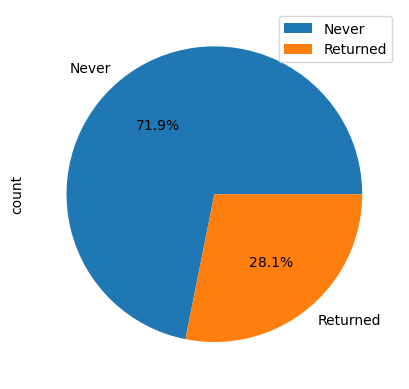

In [111]:
customer_return_count['Type'] = customer_return_count['returnCount'].apply(lambda x: 'Returned' if x >= 1 else 'Never')
customer_type = customer_return_count.reset_index().groupby("Type").agg(count=("Customer ID",'count'))
customer_type.plot.pie(y="count",autopct='%1.1f%%')

to explain, I use pie plot to show percentage of customer that have returned at least once to one who never return. With percentage and pie chart to represent customer as a whole. This illustrate clear comparision between amount of each type of customer